In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('online_retail.csv', index_col=False)

In [3]:
df = data.copy()

In [4]:
df = df.drop(columns='index')
df= df.dropna(subset=['CustomerID'])

In [5]:
df = df.drop_duplicates()

In [6]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [9]:
df1 = df.copy()

In [11]:
### Get Month
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.date

In [13]:
### Get Cohort Month
df1['FirstOrderDate'] = df1.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [14]:
### Change FirstOrderDate to dataframe dtype
df1['InvoiceMonth'] = pd.to_datetime(df1['InvoiceMonth'])
df1['FirstOrderDate'] = pd.to_datetime(df1['FirstOrderDate'])
# 월의 첫째날 가져오기
df1['InvoiceMonth'] = df1['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df1['FirstOrderDate'] = df1['FirstOrderDate'].dt.to_period('M').dt.to_timestamp()

In [15]:
df1['CohortIndex'] = (
    (df1['InvoiceMonth'].dt.year - df1['FirstOrderDate'].dt.year) * 12 +
    (df1['InvoiceMonth'].dt.month - df1['FirstOrderDate'].dt.month) #+ 1
)

In [16]:
cohort_counts = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['CustomerID']
    .nunique() #각 그룹의 고유 고객 수(CustomerID)를 직접 계산)
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


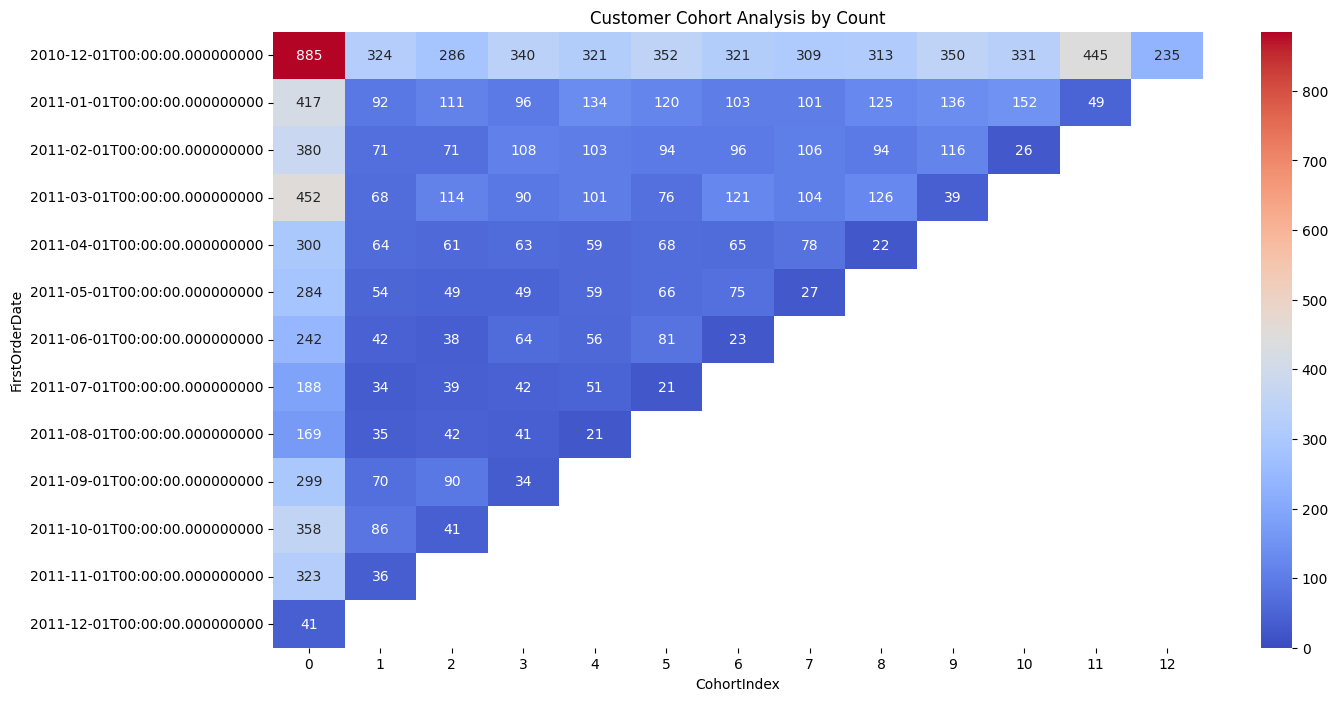

In [19]:
plt.figure(figsize=(15, 8))
plt.title('Customer Cohort Analysis by Count')
sns.heatmap(data=cohort_counts,annot = True,vmin = 0.0,fmt=".0f",cmap="coolwarm")
plt.show()

In [20]:
df1['Sales'] = df1['Quantity'] * df1['UnitPrice']

In [21]:
cohort_revenue = (
    df1.groupby(['FirstOrderDate', 'CohortIndex'])['Sales'].sum()
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_revenue

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderDate,,,,,,,,,,,,,
2010-12-01,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02-01,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03-01,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04-01,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05-01,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06-01,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


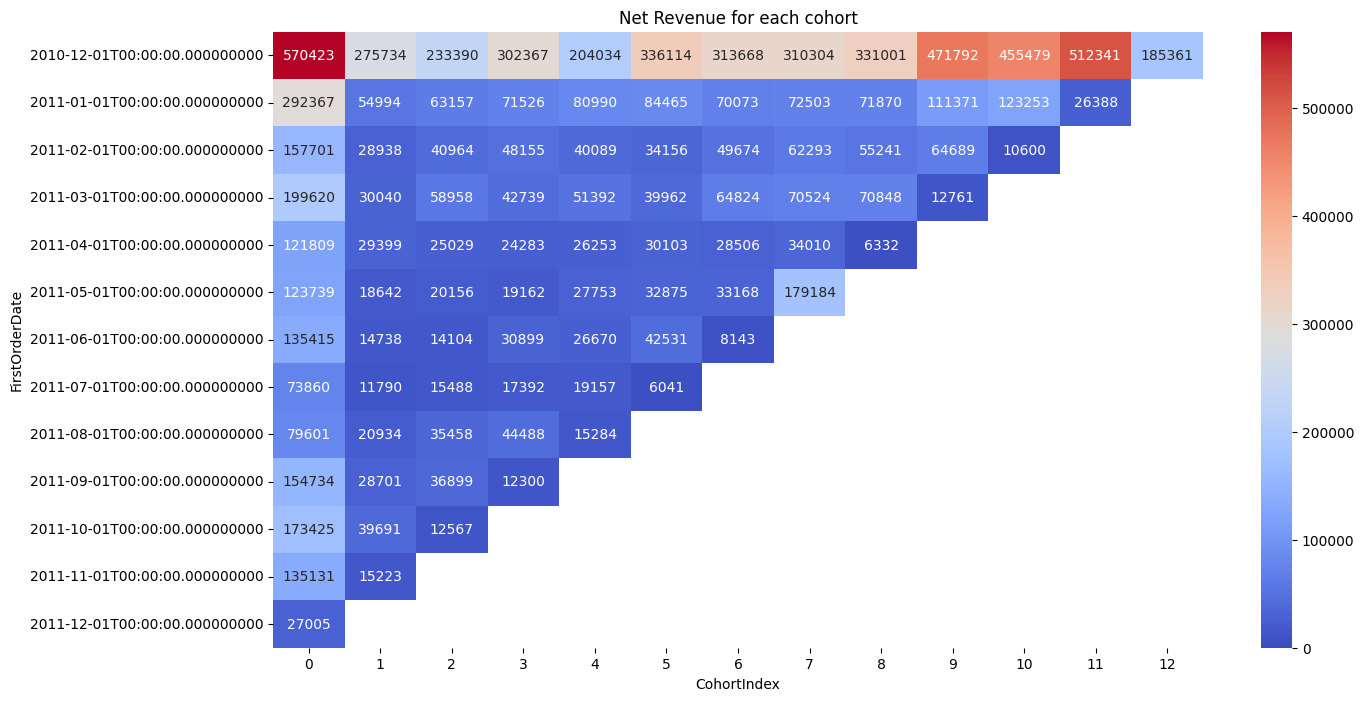

In [22]:
plt.figure(figsize=(15, 8))
plt.title('Net Revenue for each cohort')
sns.heatmap(data=cohort_revenue,annot = True,vmin = 0.0,fmt=".0f",cmap="coolwarm")
plt.show()